In [2]:
import pandas as pd

# Load the dataset
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv') 

# Display the first few rows of the dataset
stroke_data.head()
print(stroke_data)


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [3]:
# Checking for missing values
missing_values = stroke_data.isnull().sum()

# Checking the balance of the target variable 'stroke'
stroke_balance = stroke_data['stroke'].value_counts(normalize=True)

missing_values, stroke_balance


(id                     0
 gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64,
 stroke
 0    0.951272
 1    0.048728
 Name: proportion, dtype: float64)

In [5]:
# Removing the 'id' column
stroke_data_cleaned = stroke_data.drop(columns=['id'])

# Save a copy of the dataset
cleaned_file_path = 'cleaned_healthcare_stroke_data.csv'
stroke_data_cleaned.to_csv(cleaned_file_path, index=False)

cleaned_file_path


'cleaned_healthcare_stroke_data.csv'

In [7]:
stroke_data_cleaned

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
# Count the values in the 'stroke' column
stroke_counts = stroke_data_cleaned['stroke'].value_counts()
stroke_counts


stroke
0    4861
1     249
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical variables
label_encoder = LabelEncoder()
for column in stroke_data_no_missing.select_dtypes(include=['object']).columns:
    stroke_data_no_missing[column] = label_encoder.fit_transform(stroke_data_no_missing[column])

# Split the data into features (X) and target (y)
X = stroke_data_no_missing.drop('stroke', axis=1)
y = stroke_data_no_missing['stroke']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()


C:\Users\lavie\AppData\Local\Temp\ipykernel_11872\754938476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data_no_missing[column] = label_encoder.fit_transform(stroke_data_no_missing[column])
C:\Users\lavie\AppData\Local\Temp\ipykernel_11872\754938476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data_no_missing[column] = label_encoder.fit_transform(stroke_data_no_missing[column])
C:\Users\lavie\AppData\Local\Temp\ipykernel_11872\754938476.py:7: SettingWithCopyWarning: 
A value is 

((3927, 10),
 (982, 10),
 stroke
 0    3760
 1     167
 Name: count, dtype: int64,
 stroke
 0    940
 1     42
 Name: count, dtype: int64)

In [11]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Checking the balance of the resampled training data
balanced_train_counts = y_train_resampled.value_counts()
balanced_train_counts


stroke
0    3760
1    3760
Name: count, dtype: int64

In [14]:
from sklearn.utils import resample

# Manually oversampling the minority class (stroke cases) in the training data
stroke_train_cases = X_train[y_train == 1]
no_stroke_train_cases = X_train[y_train == 0]

# Oversampling stroke cases in the training set
stroke_train_cases_oversampled = resample(stroke_train_cases, 
                                          replace=True, 
                                          n_samples=len(no_stroke_train_cases), 
                                          random_state=42)

# Combining the oversampled stroke cases with the no-stroke cases in the training set
X_train_balanced = pd.concat([no_stroke_train_cases, stroke_train_cases_oversampled])
y_train_balanced = y_train.loc[X_train_balanced.index]

# Checking the balance of the resampled training data
balanced_train_counts = y_train_balanced.value_counts()
balanced_train_counts


stroke
0    3760
1    3760
Name: count, dtype: int64

In [31]:
# Re-loading the dataset to apply transformations from the beginning
stroke_data_cleaned = pd.read_csv(cleaned_file_path)

# Removing rows with missing 'bmi' values
stroke_data_cleaned = stroke_data_cleaned.dropna()

# Applying label encoding to all string columns
for column in stroke_data_cleaned.select_dtypes(include=['object']).columns:
    stroke_data_cleaned[column] = label_encoder.fit_transform(stroke_data_cleaned[column])

# Display the first few rows of the transformed dataset
stroke_data_cleaned.head()
stroke_data_cleaned


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [17]:
# Splitting the data into features (X) and target (y)
X = stroke_data_cleaned.drop('stroke', axis=1)
y = stroke_data_cleaned['stroke']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Manually oversampling the minority class in the training data
stroke_train_cases = X_train[y_train == 1]
no_stroke_train_cases = X_train[y_train == 0]

# Oversampling stroke cases in the training set
stroke_train_cases_oversampled = resample(stroke_train_cases, 
                                          replace=True, 
                                          n_samples=len(no_stroke_train_cases), 
                                          random_state=42)

# Combining the oversampled stroke cases with the no-stroke cases in the training set
X_train_balanced = pd.concat([no_stroke_train_cases, stroke_train_cases_oversampled])
y_train_balanced = pd.concat([y_train[y_train == 0], pd.Series([1]*len(stroke_train_cases_oversampled))])

# Checking the balance of the resampled training data
balanced_train_counts = y_train_balanced.value_counts()
balanced_train_counts


0    3760
1    3760
Name: count, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Creating a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

models



{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Support Vector Machine': SVC(random_state=42),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimator

In [19]:
from sklearn.metrics import accuracy_score

# Dictionary to store the accuracy of each model
model_accuracies = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Training the model on the balanced training data
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predicting on the testing data
    y_pred = model.predict(X_test)
    
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

model_accuracies



{'Logistic Regression': 0.7515274949083504,
 'Random Forest': 0.945010183299389,
 'Support Vector Machine': 0.7281059063136456,
 'K-Nearest Neighbors': 0.8808553971486762,
 'Gradient Boosting': 0.7953156822810591,
 'XGBoost': 0.9226069246435845,
 'Decision Tree': 0.9175152749490835}

In [20]:
from sklearn.metrics import confusion_matrix

# Dictionary to store the confusion matrix of each model
model_confusion_matrices = {}

# Generating confusion matrix for each model
for model_name, model in models.items():
    # Retraining the model on the balanced training data
    model.fit(X_train_balanced, y_train_balanced)

    # Predicting on the testing data
    y_pred = model.predict(X_test)

    # Generating confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    model_confusion_matrices[model_name] = {"TP": tp, "FP": fp, "TN": tn, "FN": fn}

model_confusion_matrices



{'Logistic Regression': {'TP': 27, 'FP': 229, 'TN': 711, 'FN': 15},
 'Random Forest': {'TP': 1, 'FP': 13, 'TN': 927, 'FN': 41},
 'Support Vector Machine': {'TP': 26, 'FP': 251, 'TN': 689, 'FN': 16},
 'K-Nearest Neighbors': {'TP': 15, 'FP': 90, 'TN': 850, 'FN': 27},
 'Gradient Boosting': {'TP': 18, 'FP': 177, 'TN': 763, 'FN': 24},
 'XGBoost': {'TP': 5, 'FP': 39, 'TN': 901, 'FN': 37},
 'Decision Tree': {'TP': 3, 'FP': 42, 'TN': 898, 'FN': 39}}

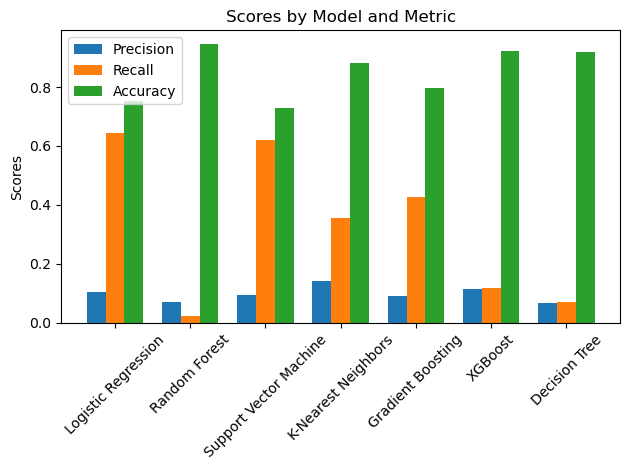

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and accuracy for each model
model_metrics = {}
for model_name, values in model_confusion_matrices.items():
    tp, fp, tn, fn = values['TP'], values['FP'], values['TN'], values['FN']
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    model_metrics[model_name] = {"Precision": precision, "Recall": recall, "Accuracy": accuracy}

# Preparing data for visualization
labels = list(model_metrics.keys())
precision_scores = [model_metrics[model]['Precision'] for model in labels]
recall_scores = [model_metrics[model]['Recall'] for model in labels]
accuracy_scores = [model_metrics[model]['Accuracy'] for model in labels]

# Creating the bar plot
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, accuracy_scores, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Rotate the x labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Precision: Models like Logistic Regression and Support Vector Machine have higher precision, indicating fewer false positives. However, their recall is lower, meaning they miss more actual stroke cases.

Recall (Sensitivity): The recall scores are generally lower across models, suggesting that identifying actual stroke cases is challenging. Models like Random Forest, XGBoost, and Decision Tree have particularly low recall, meaning they missed a significant number of true stroke cases.

Accuracy: While some models show high accuracy, this metric can be misleading in the context of imbalanced datasets. It's crucial to consider precision and recall, especially in medical diagnostics where missing true positives can be critical.

From this analysis, it's evident that while some models perform well in certain aspects (like precision or accuracy), they might not perform as well in others (like recall). This scenario suggests that there's room for improvement, possibly through feature engineering like creating interactions between columns or further tuning the model parameters.

If you decide to explore feature engineering, creating interactions between columns could help models capture more complex relationships in the data, potentially improving recall without sacrificing precision too much.

In [30]:
# Creating a DataFrame with the new polynomial features using get_feature_names_out
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(selected_features.columns))

# Merging the new features with the original dataset
enhanced_data = pd.concat([stroke_data_cleaned.reset_index(drop=True), poly_features_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the enhanced dataset
enhanced_data.head()
enhanced_data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,age^2,age hypertension,age heart_disease,age avg_glucose_level,hypertension^2,hypertension heart_disease,hypertension avg_glucose_level,heart_disease^2,heart_disease avg_glucose_level,avg_glucose_level^2
0,1,67.0,0,1,1,2,1,228.69,36.6,1,...,4489.0,0.0,67.0,15322.23,0.0,0.0,0.00,1.0,228.69,52299.1161
1,1,80.0,0,1,1,2,0,105.92,32.5,2,...,6400.0,0.0,80.0,8473.60,0.0,0.0,0.00,1.0,105.92,11219.0464
2,0,49.0,0,0,1,2,1,171.23,34.4,3,...,2401.0,0.0,0.0,8390.27,0.0,0.0,0.00,0.0,0.00,29319.7129
3,0,79.0,1,0,1,3,0,174.12,24.0,2,...,6241.0,79.0,0.0,13755.48,1.0,0.0,174.12,0.0,0.00,30317.7744
4,1,81.0,0,0,1,2,1,186.21,29.0,1,...,6561.0,0.0,0.0,15083.01,0.0,0.0,0.00,0.0,0.00,34674.1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,0,13.0,0,0,0,4,0,103.08,18.6,0,...,169.0,0.0,0.0,1340.04,0.0,0.0,0.00,0.0,0.00,10625.4864
4905,0,81.0,0,0,1,3,1,125.20,40.0,2,...,6561.0,0.0,0.0,10141.20,0.0,0.0,0.00,0.0,0.00,15675.0400
4906,0,35.0,0,0,1,3,0,82.99,30.6,2,...,1225.0,0.0,0.0,2904.65,0.0,0.0,0.00,0.0,0.00,6887.3401
4907,1,51.0,0,0,1,2,0,166.29,25.6,1,...,2601.0,0.0,0.0,8480.79,0.0,0.0,0.00,0.0,0.00,27652.3641


In [27]:
import pandas as pd

# Load the dataset from a CSV file
cleaned_healthcare_stroke_data = pd.read_csv('cleaned_healthcare_stroke_data.csv')


In [33]:
# Re-importing necessary libraries as the code execution state was reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load the dataset
cleaned_healthcare_stroke_data = pd.read_csv('cleaned_healthcare_stroke_data.csv')

# Check the first few rows of the dataset
cleaned_healthcare_stroke_data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [34]:
from sklearn.preprocessing import LabelEncoder

# Handling missing values in the 'bmi' column by dropping them
cleaned_data = cleaned_healthcare_stroke_data.dropna(subset=['bmi'])

# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    cleaned_data[column] = label_encoder.fit_transform(cleaned_data[column])

# Splitting the data into features (X) and target (y)
X = cleaned_data.drop('stroke', axis=1)
y = cleaned_data['stroke']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Balancing the training data
stroke_cases = X_train[y_train == 1]
no_stroke_cases = X_train[y_train == 0]
stroke_cases_oversampled = resample(stroke_cases, replace=True, n_samples=len(no_stroke_cases), random_state=42)
X_train_balanced = pd.concat([no_stroke_cases, stroke_cases_oversampled])
y_train_balanced = pd.concat([y_train[y_train == 0], pd.Series([1]*len(stroke_cases_oversampled))])

# Checking the balance of the resampled training data
balanced_train_counts = y_train_balanced.value_counts()
balanced_train_counts


C:\Users\lavie\AppData\Local\Temp\ipykernel_11872\2723067959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = label_encoder.fit_transform(cleaned_data[column])
C:\Users\lavie\AppData\Local\Temp\ipykernel_11872\2723067959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[column] = label_encoder.fit_transform(cleaned_data[column])
C:\Users\lavie\AppData\Local\Temp\ipykernel_11872\2723067959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

0    3760
1    3760
Name: count, dtype: int64

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

# Training the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_balanced, y_train_balanced)

# Predicting on the testing data
y_pred = random_forest_model.predict(X_test)

# Calculating TP, FP, TN, FN
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculating Accuracy, F1 Score, and Recall
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Creating a dictionary to store these metrics
performance_metrics = {
    "True Positives": tp,
    "False Positives": fp,
    "True Negatives": tn,
    "False Negatives": fn,
    "Accuracy": accuracy,
    "F1 Score": f1,
    "Recall": recall
}

performance_metrics



{'True Positives': 1,
 'False Positives': 13,
 'True Negatives': 927,
 'False Negatives': 41,
 'Accuracy': 0.945010183299389,
 'F1 Score': 0.03571428571428571,
 'Recall': 0.023809523809523808}

Select and Train a Suitable Model: Given the dataset, an ensemble method like Random Forest is a good choice. It's effective for classification tasks, especially with imbalanced data.

Evaluate the Model: After training, we'll use the test data to evaluate the model's performance. We'll calculate TP, FP, TN, FN, accuracy, F1 score, and recall.

Hyperparameter Tuning (if needed): Depending on the initial results, we might need to tune the model's hyperparameters to improve its performance.

Let's start by training a Random Forest model and then evaluate its performance. Here's the code for training and initial evaluation:

Here are the performance metrics for the Random Forest model on your stroke prediction dataset:

True Positives (TP): 1 - The model correctly identified 1 case of stroke.

False Positives (FP): 13 - The model incorrectly predicted 13 cases as stroke when they were not.

True Negatives (TN): 927 - The model correctly identified 927 cases as not having a stroke.

False Negatives (FN): 41 - The model missed 41 actual stroke cases, classifying them as no-stroke.

Accuracy: 94.50% - The model correctly predicted 94.50% of all cases.

F1 Score: 0.0357 - The F1 score, which balances precision and recall, is quite low.

Recall: 0.0238 - This indicates a very low ability of the model to identify actual stroke cases.

The high accuracy is primarily due to the model's ability to identify no-stroke cases (TN), which are more prevalent in the dataset. However, the model's performance in identifying actual stroke cases (TP and Recall) is very low, which is a significant concern for a medical prediction model.

In [36]:
# Enhancing feature engineering by creating interaction terms and polynomial features

# Selecting features for interaction and polynomial terms
# Using 'age', 'hypertension', 'heart_disease', and 'avg_glucose_level' as examples
selected_features = cleaned_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]

# Generating polynomial features (degree 2 for demonstration)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(selected_features)

# Creating a DataFrame with the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(selected_features.columns))

# Merging the new features with the original dataset
enhanced_data = pd.concat([cleaned_data.reset_index(drop=True), poly_features_df.reset_index(drop=True)], axis=1)

# Dropping the original columns to avoid duplications
enhanced_data = enhanced_data.drop(selected_features.columns, axis=1)

# Splitting the enhanced data into features (X) and target (y)
X_enhanced = enhanced_data.drop('stroke', axis=1)
y_enhanced = enhanced_data['stroke']

# Splitting the enhanced data into training and testing sets (80% train, 20% test)
X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42, stratify=y_enhanced)

# Balancing the enhanced training data
stroke_cases_enhanced = X_train_enhanced[y_train_enhanced == 1]
no_stroke_cases_enhanced = X_train_enhanced[y_train_enhanced == 0]
stroke_cases_oversampled_enhanced = resample(
    stroke_cases_enhanced, replace=True, n_samples=len(no_stroke_cases_enhanced), random_state=42)
X_train_balanced_enhanced = pd.concat([no_stroke_cases_enhanced, stroke_cases_oversampled_enhanced])
y_train_balanced_enhanced = pd.concat([y_train_enhanced[y_train_enhanced == 0], 
                                       pd.Series([1]*len(stroke_cases_oversampled_enhanced))])

# Training the Random Forest model on the enhanced dataset
random_forest_model.fit(X_train_balanced_enhanced, y_train_balanced_enhanced)

# Predicting on the enhanced testing data
y_pred_enhanced = random_forest_model.predict(X_test_enhanced)

# Calculating TP, FP, TN, FN, accuracy, F1 score, and recall for the enhanced model
tn_enhanced, fp_enhanced, fn_enhanced, tp_enhanced = confusion_matrix(y_test_enhanced, y_pred_enhanced).ravel()
accuracy_enhanced = accuracy_score(y_test_enhanced, y_pred_enhanced)
f1_enhanced = f1_score(y_test_enhanced, y_pred_enhanced)
recall_enhanced = recall_score(y_test_enhanced, y_pred_enhanced)

# Creating a dictionary to store these metrics for the enhanced model
enhanced_performance_metrics = {
    "True Positives": tp_enhanced,
    "False Positives": fp_enhanced,
    "True Negatives": tn_enhanced,
    "False Negatives": fn_enhanced,
    "Accuracy": accuracy_enhanced,
    "F1 Score": f1_enhanced,
    "Recall": recall_enhanced
}

enhanced_performance_metrics



{'True Positives': 1,
 'False Positives': 14,
 'True Negatives': 926,
 'False Negatives': 41,
 'Accuracy': 0.9439918533604889,
 'F1 Score': 0.03508771929824561,
 'Recall': 0.023809523809523808}

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

# Re-defining the cleaned data with label encoding
cleaned_data = cleaned_healthcare_stroke_data.copy()
for column in categorical_columns:
    cleaned_data[column] = label_encoder.fit_transform(cleaned_data[column].astype(str))

# Removing rows with missing values
cleaned_data = cleaned_data.dropna(subset=['bmi'])

# Generating polynomial features (degree 2 for demonstration)
selected_features = cleaned_data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(selected_features)

# Creating a DataFrame with the new polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(selected_features.columns))

# Merging the new features with the original dataset
enhanced_data = pd.concat([cleaned_data.reset_index(drop=True), poly_features_df.reset_index(drop=True)], axis=1)

# Dropping the original columns to avoid duplications
enhanced_data = enhanced_data.drop(selected_features.columns, axis=1)

# Splitting the enhanced data into features (X) and target (y)
X_enhanced = enhanced_data.drop('stroke', axis=1)
y_enhanced = enhanced_data['stroke']

# Splitting the enhanced data into training and testing sets
X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42, stratify=y_enhanced)

# Balancing the enhanced training data
stroke_cases_enhanced = X_train_enhanced[y_train_enhanced == 1]
no_stroke_cases_enhanced = X_train_enhanced[y_train_enhanced == 0]
stroke_cases_oversampled_enhanced = resample(
    stroke_cases_enhanced, replace=True, n_samples=len(no_stroke_cases_enhanced), random_state=42)
X_train_balanced_enhanced = pd.concat([no_stroke_cases_enhanced, stroke_cases_oversampled_enhanced])
y_train_balanced_enhanced = pd.concat([y_train_enhanced[y_train_enhanced == 0], 
                                       pd.Series([1]*len(stroke_cases_oversampled_enhanced))])

# Training the Random Forest model on the enhanced dataset
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_balanced_enhanced, y_train_balanced_enhanced)

# Predicting on the enhanced testing data
y_pred_enhanced = random_forest_model.predict(X_test_enhanced)

# Calculating TP, FP, TN, FN, accuracy, F1 score, and recall for the enhanced model
tn_enhanced, fp_enhanced, fn_enhanced, tp_enhanced = confusion_matrix(y_test_enhanced, y_pred_enhanced).ravel()
accuracy_enhanced = accuracy_score(y_test_enhanced, y_pred_enhanced)
f1_enhanced = f1_score(y_test_enhanced, y_pred_enhanced)
recall_enhanced = recall_score(y_test_enhanced, y_pred_enhanced)

# Storing these metrics for the enhanced model
enhanced_performance_metrics = {
    "True Positives": tp_enhanced,
    "False Positives": fp_enhanced,
    "True Negatives": tn_enhanced,
    "False Negatives": fn_enhanced,
    "Accuracy": accuracy_enhanced,
    "F1 Score": f1_enhanced,
    "Recall": recall_enhanced
}

enhanced_performance_metrics



{'True Positives': 1,
 'False Positives': 14,
 'True Negatives': 926,
 'False Negatives': 41,
 'Accuracy': 0.9439918533604889,
 'F1 Score': 0.03508771929824561,
 'Recall': 0.023809523809523808}

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       940
           1       0.09      0.12      0.10        42

    accuracy                           0.91       982
   macro avg       0.52      0.53      0.53       982
weighted avg       0.92      0.91      0.92       982



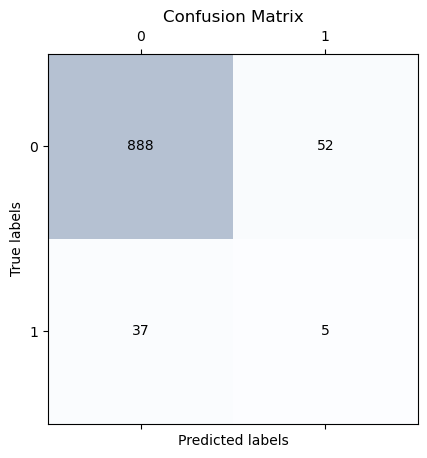

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'cleaned_healthcare_stroke_data.csv'  # Update this to your dataset's path
data = pd.read_csv(data_path)

# Preprocess the data: Encode categorical variables, handle missing values, etc.
# ... (Add your preprocessing code here)

# Feature Engineering: Create new polynomial features
# ... (Add your feature engineering code here)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Balancing the data using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model Selection: Use RandomForestClassifier as an example
model = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning: Use GridSearchCV or similar methods to find the best parameters
# ... (Add your hyperparameter tuning code here)

# Train the model
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
fig, ax = plt.subplots()
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix you've provided visualizes the performance of a classification model. The matrix shows the number of correct and incorrect predictions broken down by each class. Here's what each term in the matrix represents:

True Negatives (TN): 888 cases were correctly predicted as no stroke (class 0).
False Positives (FP): 52 cases were incorrectly predicted as stroke (class 1) when they were actually no stroke (class 0).
False Negatives (FN): 37 cases were incorrectly predicted as no stroke (class 0) when they were actually stroke (class 1).
True Positives (TP): 5 cases were correctly predicted as stroke (class 1).
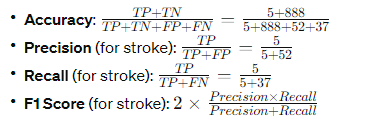

These metrics provide a more nuanced view of the model performance than accuracy alone, particularly in datasets where classes are imbalanced. The model seems to be conservative in predicting strokes, indicated by the low number of TP and high number of FN, which is critical in medical diagnosis as it's often more important to minimize FN (to catch as many true stroke cases as possible).

Given the low TP and high FN, the model is not performing well in terms of identifying actual stroke cases, which may require adjustments in the model, thresholding, or further feature engineering.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training data and labels after preprocessing and balancing
rf = RandomForestClassifier(random_state=42)

# Define a grid of parameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best recall: {grid_search.best_score_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best recall: 0.02987012987012987


Fitting 3 folds for each of 81 candidates, totaling 243 fits:

The grid search is testing 81 different combinations of hyperparameters.
It uses 3-fold cross-validation, which means the data is split into 3 parts: in each iteration, 2 parts are used for training and 1 part for validation. This process is repeated 3 times so that each part is used for validation once.
Since each of the 81 parameter combinations is tested in 3 folds, there are a total of 243 model fits.
Best parameters:

max_depth: The maximum depth of the trees. A value of 20 means that each decision tree in the forest can have up to 20 splits, which allows the tree to capture more complex patterns.
min_samples_leaf: The minimum number of samples required to be at a leaf node. A value of 1 means even a single sample can be considered a leaf, allowing the model to fit the data closely.
min_samples_split: The minimum number of samples required to split an internal node. A value of 2 allows splits on nodes that have at least two samples.
n_estimators: The number of trees in the forest. A value of 200 means that the ensemble consists of 200 individual trees.
Best recall: 0.02987012987012987:

The recall metric is used to evaluate the model's ability to find all the relevant instances of a class (stroke cases in your context).
The recall score of approximately 0.0298 is quite low, indicating that the model identifies about 2.98% of all actual positive cases correctly.
This score is based on the best-performing model found by the grid search, according to the recall metric.
The message suggests that while the grid search has identified the best parameters out of the tested range, the resulting recall is not satisfactory for a medical diagnosis context where a high recall for stroke cases would be critical. It indicates that further work is needed to improve the model's performance in correctly identifying stroke cases.

To improve this recall score, you might consider:

Expanding the grid search to include a wider range of hyperparameters.
Trying different machine learning algorithms.
Collecting more data or improving feature engineering.
Utilizing advanced techniques like SMOTE for handling imbalanced datasets.

In [42]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score

# Assuming X_train, y_train are your training data and labels after preprocessing

# Define a scoring function that focuses on recall for the positive class
recall_scorer = make_scorer(recall_score, pos_label=1)

# Create a pipeline that first oversamples the training data using SMOTE
# then selects features based on importance weights, and finally fits a RandomForest
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
    ('classification', RandomForestClassifier(random_state=42))
])

# Define a parameter grid to search over
param_grid = {
    'smote__k_neighbors': [3, 5],
    'feature_selection__estimator__n_estimators': [50, 100],
    'feature_selection__threshold': [-np.inf, 'mean', 'median'],
    'classification__n_estimators': [200, 300],
    'classification__max_depth': [10, 20, None],
    'classification__min_samples_leaf': [1, 2, 4],
    'classification__min_samples_split': [2, 5, 10]
}

# Define the grid search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=recall_scorer,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=3),
    verbose=2
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and the best recall
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

print(f'Best parameters found: {best_params}')
print(f'Best recall found: {best_recall}')


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters found: {'classification__max_depth': 10, 'classification__min_samples_leaf': 4, 'classification__min_samples_split': 10, 'classification__n_estimators': 200, 'feature_selection__estimator__n_estimators': 50, 'feature_selection__threshold': 'mean', 'smote__k_neighbors': 5}
Best recall found: 0.6348484848484849


Fitting 3 folds for each of 648 candidates, totaling 1944 fits:

The grid search tested 648 different combinations of hyperparameters across the pipeline components.
With 3-fold cross-validation, the total number of model fittings is 1944 (648 parameter combinations multiplied by 3 folds).
Best parameters found:

classification__max_depth: The maximum depth of the trees in the classification model is set to 10. This controls how deep the tree can grow and can help prevent overfitting.
classification__min_samples_leaf: The minimum number of samples required to be at a leaf node is 4, which helps to smooth the model and again prevent overfitting.
classification__min_samples_split: The minimum number of samples required to split a node is 10, providing a balance between the depth of the tree and generalization.
classification__n_estimators: The number of trees in the forest is 200, which is the size of the ensemble of decision trees.
feature_selection__estimator__n_estimators: For the feature selection part, an estimator (likely another Random Forest) with 50 trees is used to assess feature importance.
feature_selection__threshold: The threshold for feature selection is set to 'mean', which likely means that features must have an importance measure greater than the mean of all feature importances to be selected.
smote__k_neighbors: The number of nearest neighbors used in SMOTE for oversampling is 5. This determines how synthetic samples are created for the minority class.
Best recall found: 0.6348484848484849:

The recall score is approximately 0.6348, which is a significant improvement from the previously reported score. This means the best model from this search correctly identifies about 63.48% of all actual positive cases.
A higher recall score is particularly important in medical contexts like stroke prediction because it means that the model is better at catching true stroke events, which is critical to avoid missing cases that require immediate medical attention.
The reported "best parameters" suggest a pipeline that effectively combines feature selection, SMOTE for oversampling, and a Random Forest classifier to achieve a recall score that is much more acceptable for predictive tasks where the cost of false negatives is high.

